## Deng AI Tree Notebook
This notebook supports the DengAI problem and evaluates Tree-based models. The models used here were generated in initial model testing and did not provide results promising enough for further exploration.

In [1]:
#Run the utils notebook
%run DengAI-Utils.ipynb

Environment is: keras


In [2]:
#pre-process the data
df_x_train_sj, df_y_train_sj, df_x_test_sj, df_y_test_sj, df_x_valid_sj, df_y_valid_sj, df_x_pred_sj, df_y_pred_sj=pre_process_data(
    city='sj',
    train_split=0.8,
    test_split=0.2,
    valid_split=0.0,
    xy_split=0.0,
    time_series_split=True
)
#Pre-process data for iq
df_x_train_iq, df_y_train_iq, df_x_test_iq, df_y_test_iq, df_x_valid_iq, df_y_valid_iq, df_x_pred_iq, df_y_pred_iq=pre_process_data(
    city='iq',
    train_split=0.8,
    test_split=0.2,
    valid_split=0.0,
    xy_split=0.0,
    time_series_split=True
)

#set target field
target='total_cases'


#### Decision Tree Regressor

SJ Training set score: 0.98
SJ Test set score: -1.76
SJ Tree Depth:15
IQ Training set score: 0.99
IQ Test set score: -1.08
IQ Tree Depth:15


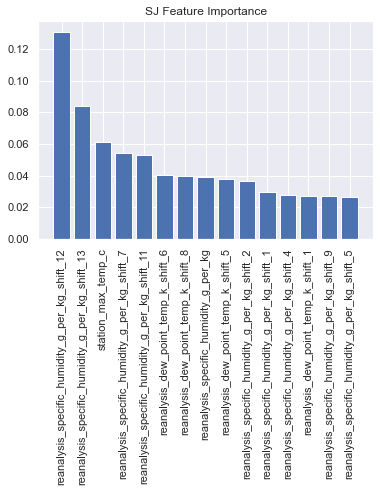

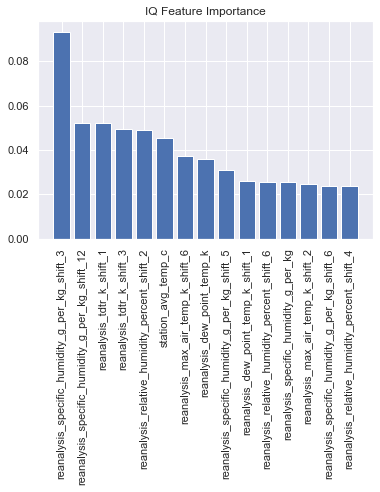

MAE of SJ: 25.87090909090909
MAE of IQ: 10.293333333333333
MAE of Combined: 20.372941176470587


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

training_feature_list_sj=df_x_train_sj.columns.tolist()
training_feature_list_iq=df_x_train_iq.columns.tolist()

depth=15

tree_reg_sj=DecisionTreeRegressor(max_depth=depth,criterion='mae')
tree_reg_sj.fit(df_x_train_sj,df_y_train_sj[target])

tree_reg_iq=DecisionTreeRegressor(max_depth=depth,criterion='mae')
tree_reg_iq.fit(df_x_train_iq,df_y_train_iq[target])

#Look at scores
print('SJ Training set score: {:.2f}'.format(tree_reg_sj.score(df_x_train_sj,df_y_train_sj[target])))
print('SJ Test set score: {:.2f}'.format(tree_reg_sj.score(df_x_test_sj,df_y_test_sj[target])))
print('SJ Tree Depth:' + str(tree_reg_sj.get_depth()))

print('IQ Training set score: {:.2f}'.format(tree_reg_iq.score(df_x_train_iq,df_y_train_iq[target])))
print('IQ Test set score: {:.2f}'.format(tree_reg_iq.score(df_x_test_iq,df_y_test_iq[target])))
print('IQ Tree Depth:' + str(tree_reg_iq.get_depth()))

#Get the feature importances for SJ and print them out
importances=tree_reg_sj.feature_importances_
df_importance=pd.DataFrame(importances)
df_importance['feature']=training_feature_list_sj
df_importance.columns=['importance','feature']
df_importance.sort_values(by='importance',ascending=False,inplace=True)

#plot the importance
plt.figure()
plt.title('SJ Feature Importance')
plt.bar(range(0,depth),df_importance.iloc[0:depth,0])
plt.xticks(range(0,depth),df_importance.iloc[0:depth,1],rotation=90)
plt.show()

#Put the feature names in a text file to use as features in regression models
df_importance.iloc[0:depth,1].to_csv('sj_feature_list.csv',header=False,index=False,sep=',')

#Get the feature importances for IQ and print them out
importances=tree_reg_iq.feature_importances_
df_importance=pd.DataFrame(importances)
df_importance['feature']=training_feature_list_iq
df_importance.columns=['importance','feature']
df_importance.sort_values(by='importance',ascending=False,inplace=True)

#plot the importance
plt.figure()
plt.title('IQ Feature Importance')
plt.bar(range(0,depth),df_importance.iloc[0:depth,0])
plt.xticks(range(0,depth),df_importance.iloc[0:depth,1],rotation=90)
plt.show()

#Put the feature names in a text file to use as features in regression models
df_importance.iloc[0:depth,1].to_csv('iq_feature_list.csv',header=False,index=False,sep=',')

#Visualize the tree
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(tree_reg, feature_names=training_feature_list, filled=False)

#Visualize text representation of tree
#text_representation = tree.export_text(tree_reg)
#print(text_representation)

y_pred_sj=tree_reg_sj.predict(df_x_test_sj)
y_pred_iq=tree_reg_iq.predict(df_x_test_iq)
y_pred_combined=np.append(y_pred_sj,y_pred_iq)
y_target_combined=np.append(df_y_test_sj[target],df_y_test_iq[target])
print('MAE of SJ: '+ str(mean_absolute_error(df_y_test_sj[target],y_pred_sj)))
print('MAE of IQ: '+ str(mean_absolute_error(df_y_test_iq[target],y_pred_iq)))
print('MAE of Combined: ' + str(mean_absolute_error(y_target_combined,y_pred_combined)))

In [26]:
#Use the trained model to make predictions on the holdout set
y_pred_sj=tree_reg_sj.predict(df_x_pred_sj)
y_pred_iq=tree_reg_iq.predict(df_x_pred_iq)

#Create the holdout file
create_submit_file(y_pred_sj,y_pred_iq)

print('-'*25)
print('Submission File Creation complete')

-------------------------
Submission File Creation complete


#### Random Forest Regressor

In [ ]:
#Start timer
from datetime import datetime
s_time=datetime.now()

#Define param grid
p_grid={
    'n_estimators':[10,100,300],
    'max_depth':[3,6,10,15,25,None],
}

from sklearn.ensemble import RandomForestRegressor

#run param grid for sj
grid_sj=GridSearchCV(RandomForestRegressor(criterion='mae'),p_grid,cv=5,return_train_score=True)
grid_sj.fit(df_x_train_sj,df_y_train_sj[target])

#run param grid for sj
grid_iq=GridSearchCV(RandomForestRegressor(criterion='mae'),p_grid,cv=5,return_train_score=True)
grid_iq.fit(df_x_train_iq,df_y_train_iq[target])

#Look at scores
print('SJ Training set score: {:.2f}'.format(grid_sj.score(df_x_train_sj,df_y_train_sj[target])))
print('SJ Test set score: {:.2f}'.format(grid_sj.score(df_x_test_sj,df_y_test_sj[target])))
#print('SJ Tree Depth:' + str(grid_sj.get_depth()))

print('IQ Training set score: {:.2f}'.format(grid_iq.score(df_x_train_iq,df_y_train_iq[target])))
print('IQ Test set score: {:.2f}'.format(grid_iq.score(df_x_test_iq,df_y_test_iq[target])))
#print('IQ Tree Depth:' + str(grid_iq.get_depth()))

y_pred_sj=grid_sj.predict(df_x_test_sj)
y_pred_iq=grid_iq.predict(df_x_test_iq)
y_pred_combined=np.append(y_pred_sj,y_pred_iq)
y_target_combined=np.append(df_y_test_sj[target],df_y_test_iq[target])
print('MAE of SJ: '+ str(mean_absolute_error(df_y_test_sj[target],y_pred_sj)))
print('MAE of IQ: '+ str(mean_absolute_error(df_y_test_iq[target],y_pred_iq)))
print('MAE of Combined: ' + str(mean_absolute_error(y_target_combined,y_pred_combined)))


In [4]:
#Look at scores
print('SJ Training set score: {:.2f}'.format(grid_sj.score(df_x_train_sj,df_y_train_sj[target])))
print('SJ Test set score: {:.2f}'.format(grid_sj.score(df_x_test_sj,df_y_test_sj[target])))

print('IQ Training set score: {:.2f}'.format(grid_iq.score(df_x_train_iq,df_y_train_iq[target])))
print('IQ Test set score: {:.2f}'.format(grid_iq.score(df_x_test_iq,df_y_test_iq[target])))

y_pred_sj=grid_sj.predict(df_x_test_sj)
y_pred_iq=grid_iq.predict(df_x_test_iq)
y_pred_combined=np.append(y_pred_sj,y_pred_iq)
y_target_combined=np.append(df_y_test_sj[target],df_y_test_iq[target])
print('MAE of SJ: '+ str(mean_absolute_error(df_y_test_sj[target],y_pred_sj)))
print('MAE of IQ: '+ str(mean_absolute_error(df_y_test_iq[target],y_pred_iq)))
print('MAE of Combined: ' + str(mean_absolute_error(y_target_combined,y_pred_combined)))

SJ Training set score: 0.22
SJ Test set score: 0.19
IQ Training set score: 0.31
IQ Test set score: -0.19
MAE of SJ: 17.757127272727274
MAE of IQ: 7.773000000000001
MAE of Combined: 14.233317647058824


#### Results
Both the decision tree and random forest regressors provided results worse than the baseline model.